In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Model from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# For Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('Datasets/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

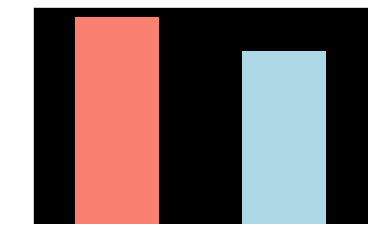

In [4]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [5]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


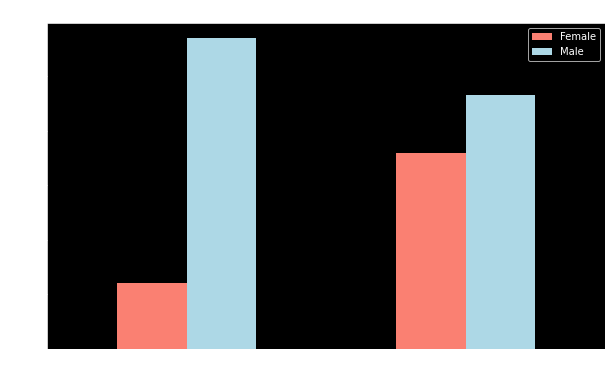

In [6]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue']);

plt.title("Heart Disease Frequency with sex")
plt.xlabel("0=No heart diseses, 1=heart disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=10);

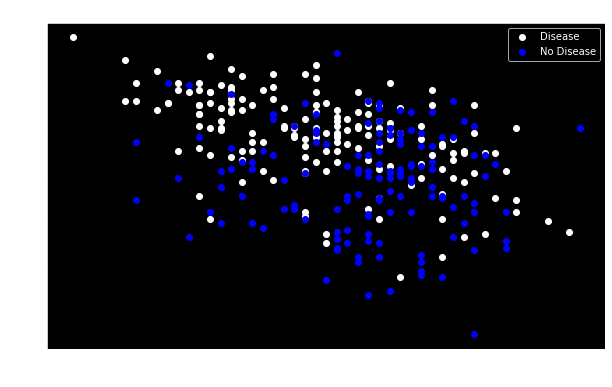

In [7]:
plt.figure(figsize=(10,6))


plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='white')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue');

plt.title("Heart Disease in function of Age and Max-Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max-Heart Rate')
plt.legend(['Disease', 'No Disease']);

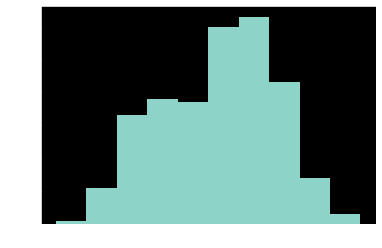

In [8]:
df.age.plot.hist();

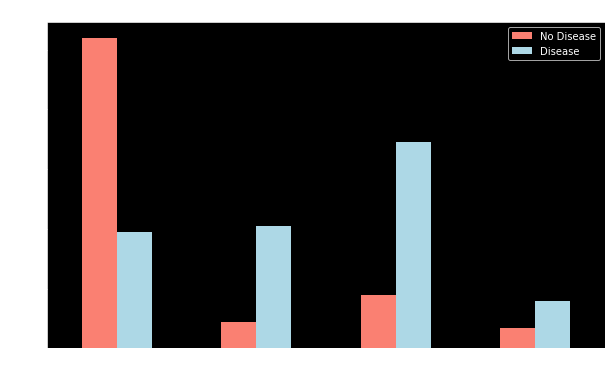

In [9]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])

plt.title("Heart Disease in function of Chest Pain Type and Target")
plt.xlabel("chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);


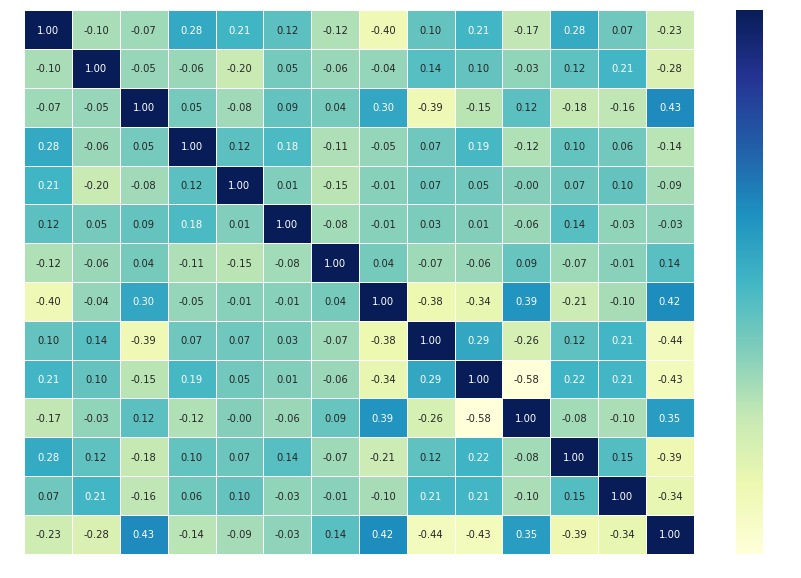

In [10]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Modeling

In [11]:
X = df.drop('target', axis=1)
Y = df['target']

np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
        ' Random Forest Classifier': RandomForestClassifier()}

def fit_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    #Loop through the models
    
    for name, model in models.items():
        #Fit the model
        model.fit(X_train, Y_train)
        #Evaluate the Model and append them to the model_score
        model_scores[name] = model.score(X_test, Y_test)
        
    return model_scores

In [13]:
model_scores = fit_score(models = models,
          X_train=X_train,
          X_test=X_test,
          Y_train=Y_train,
          Y_test=Y_test)

model_scores

C:\Users\afaqu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 ' Random Forest Classifier': 0.8360655737704918}

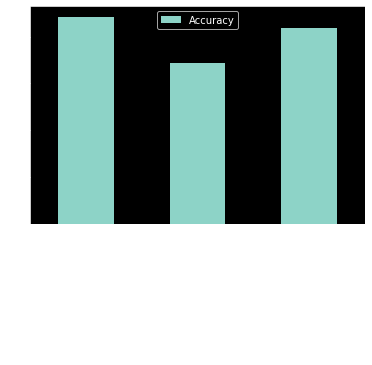

In [14]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

model_compare.T.plot.bar();

Important in Classification Problem:
* Hyperarameter Tuning
* Feature Imortance
* Confusion Matrix
* Cross Validation
* precision
* Recall
* f1 Score
* Classification Report
* ROC Curve
* Area Under the Curve(AUC)
### HyperParameter Tuning

In [15]:
Train_scores = []
Test_scores = []

# Try different values of n_neighbors
neighbors = range(1,21)

# setup KNN intences
knn = KNeighborsClassifier()

for i in neighbors :
    knn.set_params(n_neighbors =i)
    
    # Now fit the Model
    
    knn.fit(X_train, Y_train)
    
    #update the training score
    
    Train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test score
    
    Test_scores.append(knn.score(X_test, Y_test))

In [16]:
Test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum score of KNN Model is : 75.41%


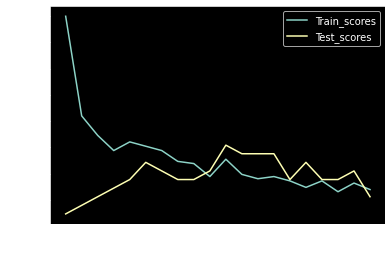

In [17]:
plt.plot(neighbors, Train_scores, label="Train_scores")
plt.plot(neighbors, Test_scores, label="Test_scores")

plt.xlabel("No. of neighbors")
plt.ylabel("Scores of the Model")
plt.legend()

print(f"maximum score of KNN Model is : {max(Test_scores)*100:.2f}%")

### 

### HyperParaneter tuning
* LogisticRegression
* RandomForest Classifier

#### Set-up Both of model's parameter

In [18]:
# Parameters for Logistc Regression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Parameters for RandomForest Regression

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### Tune LogisticRegression
#### Using RandomizedSearchCV

# 

In [19]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                verbose=True,
                                n_iter=20)

rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

### Tune RandomForest Regression

In [21]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True,
                                n_iter=20)

rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [22]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

### Using GridSearchCV

In [23]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [24]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [25]:
y_pred = gs_log_reg.predict(X_test)

#### Creating ROC Curve

C:\Users\afaqu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


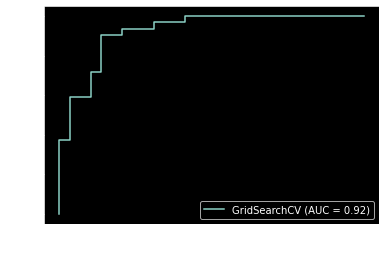

In [26]:
plot_roc_curve(gs_log_reg, X_test, Y_test)

#### Confusuion Matrix

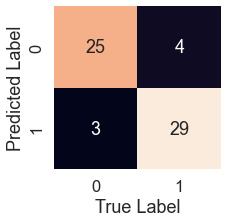

In [27]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, y_pred),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")    
    
plot_conf_mat(Y_test, y_pred)

In [28]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [29]:
clf = LogisticRegression(C= 0.23357214690901212, 
                         solver= 'liblinear')

In [31]:
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring='accuracy')

cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

In [32]:
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring='precision')

cv_precision_mean = np.mean(cv_precision)
cv_precision_mean

0.8215873015873015

In [33]:
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring='recall')

cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9272727272727274

In [34]:
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring='f1')

cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.8705403543192143

<AxesSubplot:title={'center':'Cross Validated classification metrics'}>

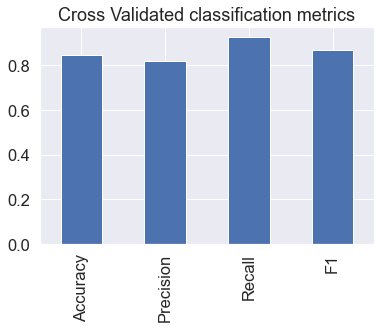

In [39]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc_mean,
                          'Precision': cv_precision_mean,
                          'Recall':cv_recall_mean,
                          'F1': cv_f1_mean},
                          index=[0])

cv_metrics.T.plot.bar(title = "Cross Validated classification metrics",
                      legend = False)